In [ ]:
import os
folder_path = "split_data/train"
for dirpath, dirnames, filenames in os.walk(folder_path):
    for file_name in filenames:
        print(dirpath+"/"+file_name)

# Normal

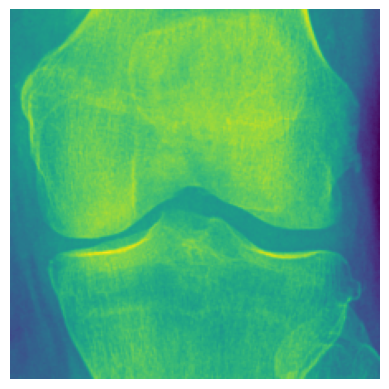

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# Load the image file
image_path = 'split_data/train/2/9873823L.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for a cleaner look
plt.show()


# Image Normalization:

- Normalize the pixel values to a common range, such as 0 to 1 or -1 to 1, to ensure that all features have a similar scale.

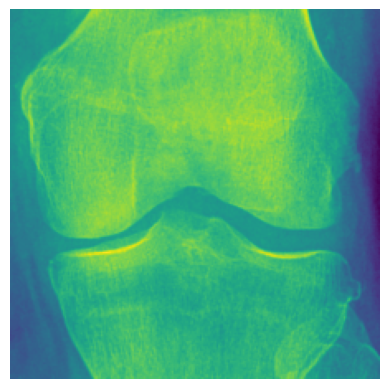

In [34]:
import numpy as np

def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

normalised_img = normalize_image(img)
plt.imshow(normalised_img)
plt.axis('off')  # Turn off axis labels for a cleaner look
plt.show()

# Resizing:

- Resize the input images to a consistent size to ensure that all images have the same dimensions. This is important for feeding the images into a neural network.

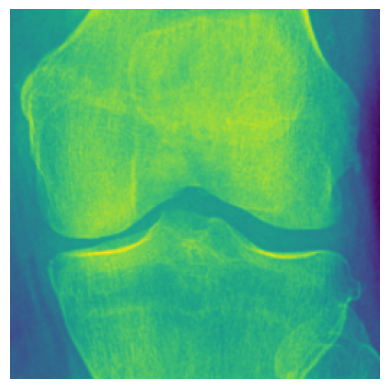

In [35]:
from PIL import Image

def resize_image(image, target_size):
    return np.array(Image.fromarray(image).resize(target_size))

resized_img = resize_image(normalised_img,(256,256))
plt.imshow(resized_img)
plt.axis('off')
plt.show()

# Histogram Equalization:

- Apply histogram equalization to enhance the contrast of the images, which can help the model better distinguish the relevant features.

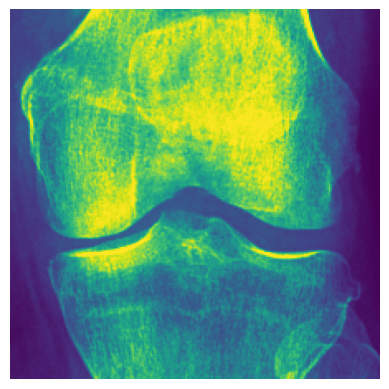

In [39]:
import cv2
def equalize_histogram(image):
    return cv2.equalizeHist(image)

# Apply equalization and display the image
equalized_img = equalize_histogram(img)
plt.imshow(equalized_img)
plt.axis('off')
plt.show()

# Combination

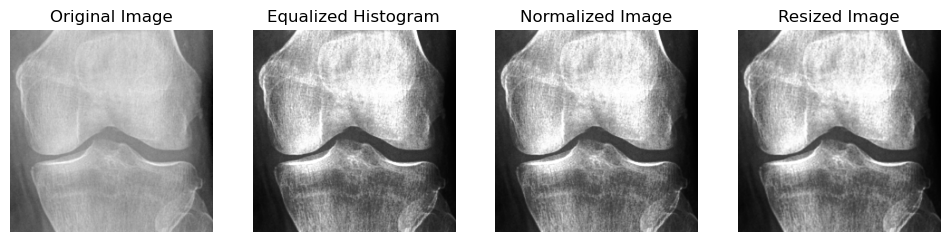

array([[46, 51, 52, ..., 10, 10, 10],
       [45, 50, 51, ...,  9,  9, 11],
       [46, 48, 49, ...,  9,  8, 10],
       ...,
       [19, 17, 18, ..., 41, 34, 31],
       [19, 18, 17, ..., 39, 33, 34],
       [16, 16, 16, ..., 37, 33, 36]], dtype=uint8)

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class ImagePreprocessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    def equalize_histogram(self):
        self.equalized_img = cv2.equalizeHist(self.original_img)
        return self.equalized_img

    def normalize_image(self, image):
        normalized_img = (image - np.min(image)) / (np.max(image) - np.min(image))
        return normalized_img

    def resize_image(self, image, target_size):
        resized_img = np.array(Image.fromarray((image * 255).astype(np.uint8)).resize(target_size))
        return resized_img

    def process_and_display(self):
        # Perform all preprocessing steps
        equalized_img = self.equalize_histogram()
        normalized_img = self.normalize_image(equalized_img)
        resized_img = self.resize_image(normalized_img, (256, 256))

        # Plot the images with headings
        images = [self.original_img, equalized_img, normalized_img, resized_img]
        titles = ['Original Image', 'Equalized Histogram', 'Normalized Image', 'Resized Image']

        plt.figure(figsize=(12, 4))
        for i, (img, title) in enumerate(zip(images, titles)):
            plt.subplot(1, 4, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(title)
            plt.axis('off')
        
        plt.show()

        return resized_img

# Usage
image_path = 'split_data/train/2/9873823L.png'
preprocessor = ImagePreprocessor(image_path)
final_image = preprocessor.process_and_display()